In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [2]:
# Leitura do dataset
df = pd.read_csv("orders.csv",sep=";")
df

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_created_month,order_created_year,order_moment_created,order_moment_accepted,order_moment_ready,order_moment_collected,order_moment_in_expedition,order_moment_delivering,order_moment_delivered,order_moment_finished
0,68405119,3512,5,68405119,68405119,CANCELED,62.70,0.0,NaN,0,...,1,2021,01/01/2021 00:01:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.70,0.0,NaN,0,...,1,2021,01/01/2021 00:04:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.50,0.0,NaN,0,...,1,2021,01/01/2021 00:13:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68405465,3401,5,68405465,68405465,CANCELED,55.90,0.0,NaN,0,...,1,2021,01/01/2021 00:19:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68406064,3401,5,68406064,68406064,CANCELED,37.90,0.0,NaN,0,...,1,2021,01/01/2021 00:26:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012680,51279246,1107,5,51279246,51279246,CANCELED,206.50,9.9,0.0,23,...,12,2021,31/12/2021 23:44:52,31/12/2021 23:45:25,NaN,NaN,NaN,NaN,NaN,NaN
1012681,51279247,1107,5,51279247,51279247,CANCELED,181.00,9.9,0.0,23,...,12,2021,31/12/2021 23:46:45,31/12/2021 23:47:24,NaN,NaN,NaN,NaN,NaN,NaN
1012682,51279248,525,31,51279248,51279248,CANCELED,2.00,0.0,0.0,23,...,12,2021,31/12/2021 23:55:34,31/12/2021 23:55:41,31/12/2021 23:56:14,NaN,NaN,NaN,NaN,NaN
1012683,51279249,2700,5,51279249,51279249,CANCELED,126.06,7.0,0.0,23,...,12,2021,31/12/2021 23:56:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Número de linhas e colunas
df.shape

(1012685, 22)

In [4]:
# Identificando quantidade de NULL
df.isnull().sum()

order_id                           0
store_id                           0
channel_id                         0
payment_order_id                   0
delivery_order_id                  0
order_status                       0
order_amount                       0
order_delivery_fee                 0
order_delivery_cost            16995
order_created_hour                 0
order_created_minute               0
order_created_day                  0
order_created_month                0
order_created_year                 0
order_moment_created               0
order_moment_accepted          23470
order_moment_ready             49729
order_moment_collected        115414
order_moment_in_expedition    180581
order_moment_delivering        66872
order_moment_delivered        957904
order_moment_finished          42489
dtype: int64

In [5]:
# Deletando colunas com mais de 20 mil valores NULL
df = df.dropna(axis=1, thresh=992685)

# Deletando linhas com valores NULL
df = df.dropna(axis=0)


In [6]:

# Deletando colunas que não serão usadas
df = df.drop(columns=["order_id","store_id","channel_id","payment_order_id","delivery_order_id","order_created_hour","order_status","order_created_minute","order_created_year","order_created_day","order_created_month"])

In [7]:
# Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995690 entries, 7 to 1012684
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_amount          995690 non-null  float64
 1   order_delivery_fee    995690 non-null  float64
 2   order_delivery_cost   995690 non-null  float64
 3   order_moment_created  995690 non-null  object 
dtypes: float64(3), object(1)
memory usage: 38.0+ MB


In [8]:
# Estatística descritiva
df.describe()

,order_amount,order_delivery_fee,order_delivery_cost
count,995690.000000,995690.000000,995690.000000
mean,99.225364,6.222270,7.303804
std,201.680418,6.199489,3.963485
min,0.000000,0.000000,0.000000
25%,39.800000,0.000000,5.250000
50%,69.900000,6.900000,7.250000
75%,119.800000,11.900000,8.750000
max,100000.110000,990.110000,156.000000


In [9]:
# Transformando a coluna  order_moment_created para data
df["order_moment_created"] = pd.to_datetime(df["order_moment_created"], format = "%d/%m/%Y %H:%M:%S")
df["order_moment_created"] = df["order_moment_created"].dt.date
df['order_moment_created'] = pd.to_datetime(df.order_moment_created, infer_datetime_format=True) 


In [10]:
# Criando coluna com valor de receita
df["order_revenue"] = df["order_amount"]-(df["order_delivery_fee"]+df["order_delivery_cost"])

In [11]:
# Deletando linhas com order_revenue negativo
df.drop(df[ df['order_revenue'] < 0].index , inplace=True)

In [12]:
# Identificando os outliers na coluna order_revenue
q1 = df.order_revenue.quantile(.25)
q3 = df.order_revenue.quantile(.75)
IQR= q3 - q1

sup = q3 + 1.5*IQR
inf = q1 - 1.5*IQR
print("IQR variável é: ", IQR)
print("O limite superior é: ",sup)
print("O limite inferior é: ",inf)

print("O dataset tem {} colunas,".format(df.shape[0]))
print("e {} estão acima de 217.5,".format(len(df[df.order_revenue > 217.5])))
print("Isso representa {:.2f}% do dataset.\n".format((len(df[df.order_revenue > 217.5]) / df.shape[0])*100))

IQR variável é:  75.28
O limite superior é:  217.5
O limite inferior é:  -83.62
O dataset tem 987832 colunas,
e 55798 estão acima de 217.5,
Isso representa 5.65% do dataset.



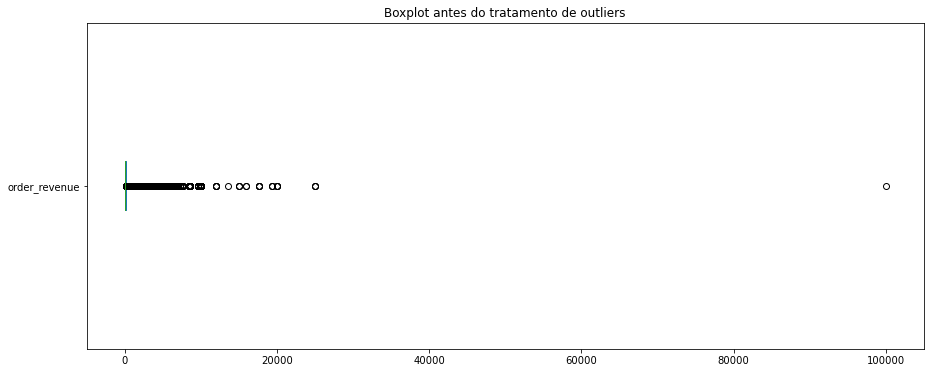

<Figure size 432x288 with 0 Axes>

In [13]:
# Plot the boxplot para melhor visualizar outliers
fig, ax = plt.subplots(figsize = (15,6))
df.order_revenue.plot(kind = 'box', vert = False)
ax.set_title("Boxplot antes do tratamento de outliers")
plt.show()
plt.tight_layout()

In [14]:
# Tratamento de outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.order_revenue > 217.5].index,axis =0, inplace = True)

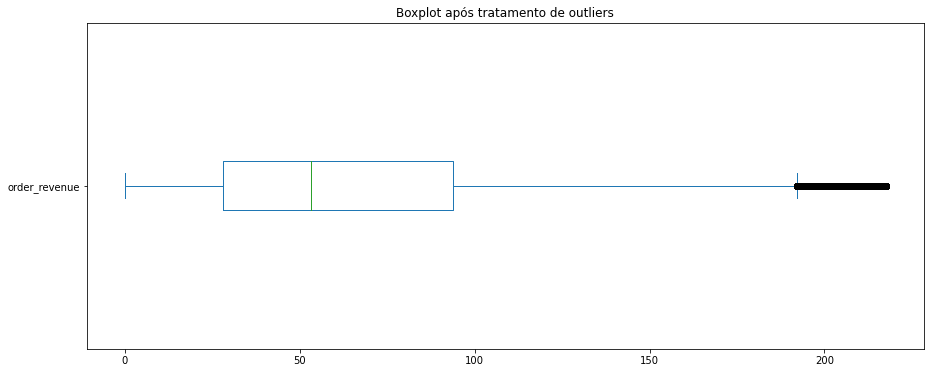

<Figure size 432x288 with 0 Axes>

In [15]:
# Plot the boxplot
fig, ax = plt.subplots(figsize = (15,6))
df_clean.order_revenue.plot(kind = 'box', vert = False)
ax.set_title("Boxplot após tratamento de outliers")
plt.show()
plt.tight_layout()

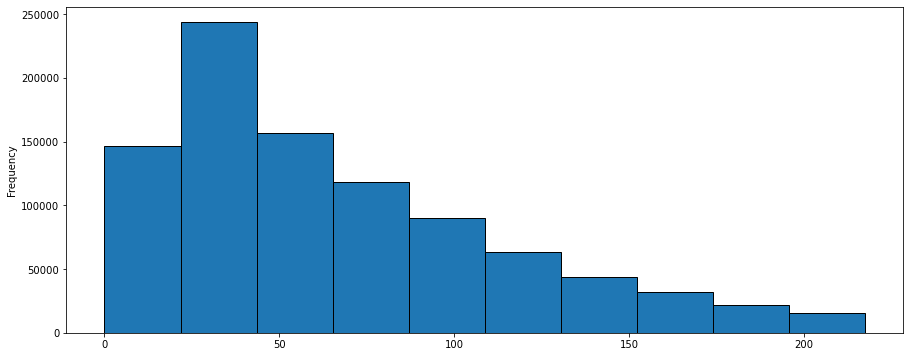

In [16]:
# Gráfico histograma para entender a frequência do valor de faturamento
plt.figure(figsize =(15,6))
df_clean["order_revenue"].plot.hist(edgecolor='black');

<Figure size 1080x576 with 0 Axes>

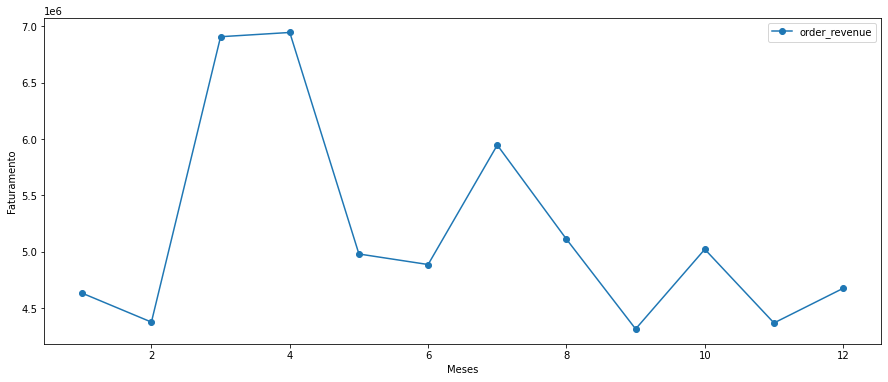

In [17]:
# Gráfico de linhas do faturamento por mês
df_mes = df_clean.groupby([df_clean["order_moment_created"].dt.month]).sum()
df_mes = df_mes.reset_index(drop=False)
plt.figure(figsize =(15,8))
df_mes.plot("order_moment_created","order_revenue", xlabel = "Meses", ylabel = "Faturamento",figsize = (15,6), marker='o');


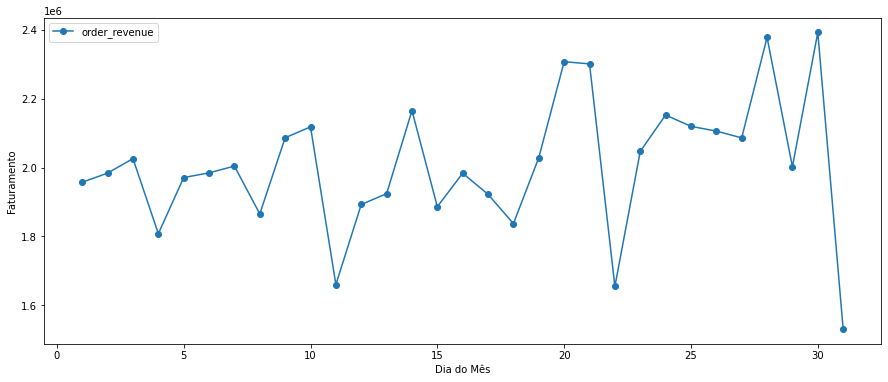

In [18]:
# Gráfico de linhas do faturamento por dia do mês
df_dia_m = df_clean.groupby([df_clean["order_moment_created"].dt.day]).sum()
df_dia_m = df_dia_m.reset_index(drop=False)
df_dia_m.plot("order_moment_created","order_revenue", xlabel = "Dia do Mês", ylabel = "Faturamento", figsize = (15,6), marker='o');


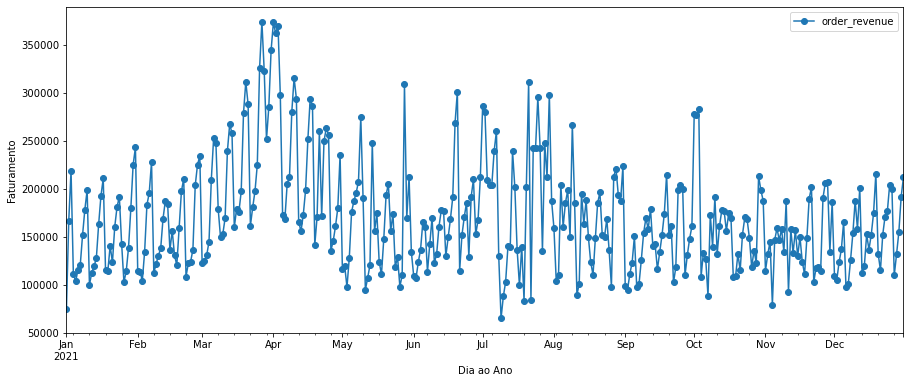

In [19]:
# Gráfico de linhas do faturamento por dia ao ano
df_dia = df_clean.groupby(["order_moment_created"]).sum()
df_dia = df_dia.reset_index(drop=False)
df_dia.plot("order_moment_created","order_revenue", xlabel = "Dia ao Ano", ylabel = "Faturamento",  figsize = (15,6), marker='o');

Previsão de Séries Temporais com o Prophet 

In [20]:
# Gerando o DF de previsão agrupando o faturamento por dia
df_pre_dia = df_dia.copy()
df_pre_dia = df_pre_dia.drop(columns=["order_amount","order_delivery_fee","order_delivery_cost"])
# Renomeando as colunas de acordo com o padrão Prophet
df_pre_dia = df_pre_dia.rename(columns={"order_moment_created": "ds", "order_revenue": "y"})

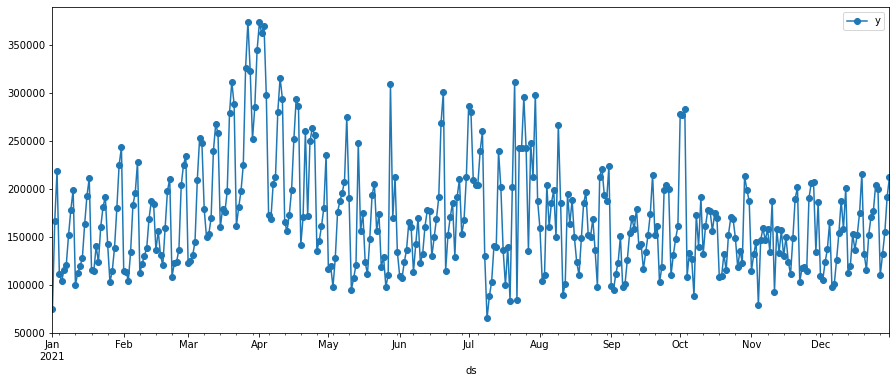

In [21]:
# Visualizando mais uma vez a Série Temporal por dia
df_pre_dia.plot(x = 'ds', y = 'y', figsize = (15,6), marker='o');


In [22]:
# Instanciando o modelo
m = Prophet(daily_seasonality=True, yearly_seasonality=True)

In [23]:
# Ajustando o modelo aos dados
m.fit(df_pre_dia)

In [24]:
# Criando dataframe com os períodos futuros para as previsões
st_futuro = m.make_future_dataframe(periods= 180, freq = "d",  include_history = True)

In [25]:
# Realizando as previsões
previsao_Prophet = m.predict(st_futuro)

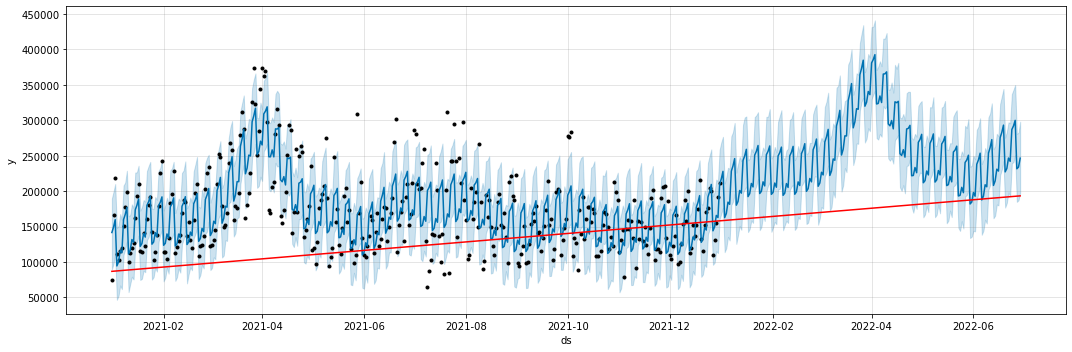

In [26]:
# Visualizando o grafico da previsao
fig = m.plot(previsao_Prophet,figsize = (15,5))
a = add_changepoints_to_plot(fig.gca(), m, previsao_Prophet)


In [27]:
# Criando dataframe com os períodos futuros para as previsões Mensais
st_futuro = m.make_future_dataframe(periods= 6, freq = "m",  include_history = True)

In [28]:
# Realizando as previsões
previsao_Prophet = m.predict(st_futuro)

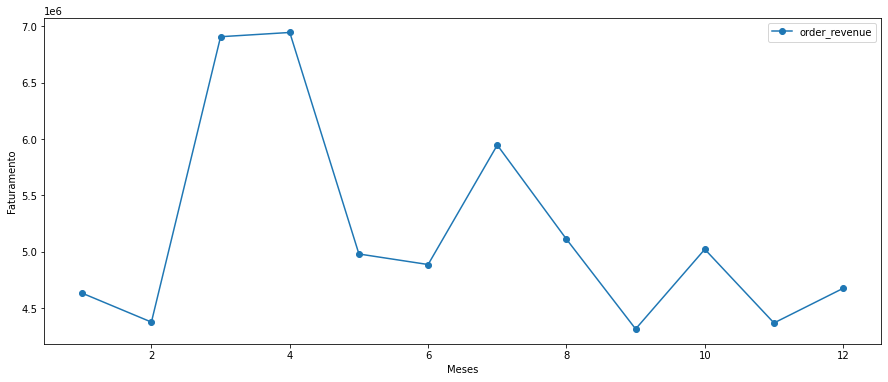

In [29]:
# Visualizando mais uma vez a Série Temporal por Mês
df_mes.plot("order_moment_created","order_revenue", xlabel = "Meses", ylabel = "Faturamento",figsize = (15,6), marker='o');


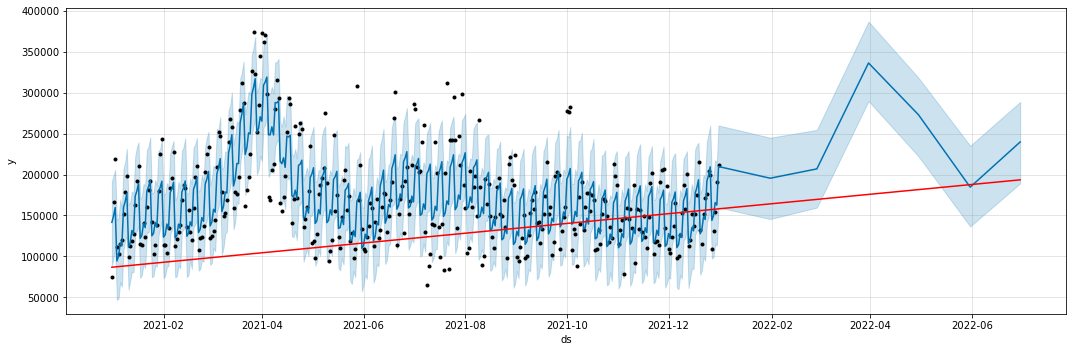

In [30]:
# Visualizando o grafico da previsao por Mês
fig = m.plot(previsao_Prophet,figsize = (15,5))
a = add_changepoints_to_plot(fig.gca(), m, previsao_Prophet)
